<a href="https://colab.research.google.com/github/MatheusMataBIO/Projeto-ciencia-de-dados-acidentes-Porto-Alegre/blob/main/Projeto_ci%C3%AAncia_de_dados_acidentes_Porto_Alegre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# importando a base de dados o "sep" vai organizar melhor a tabela

df = pd.read_csv('/content/cat_acidentes.csv', sep=';')

In [ ]:
df

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2024-06-12 11:56:30,0.0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,...,0.000000e+00,0.000000e+00,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2024-06-12 11:56:30,6699.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,3,...,-8.178406e+08,1.295680e+09,AV ASSIS BRASIL,NaN,ABALROAMENTO,TERÇA-FEIRA,02:45:00.0000000,NOITE,NORTE,NaN
2,2024-06-12 11:56:30,411.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,2,...,-8.267608e+08,1.292030e+09,R DR BARROS CASSAL,NaN,ABALROAMENTO,TERÇA-FEIRA,07:36:00.0000000,DIA,CENTRO,NaN
3,2024-06-12 11:56:30,1500.0,0.0,2019-01-01 00:00:00,4,2,0,0,0,1,...,-8.272275e+08,1.285404e+09,AV FABIO ARAUJO SANTOS,NaN,CHOQUE,TERÇA-FEIRA,16:50:00.0000000,DIA,SUL,NaN
4,2024-06-12 11:56:30,8799.0,0.0,2019-01-01 00:00:00,5,0,0,0,0,3,...,-8.201465e+08,1.288712e+09,AV IPIRANGA,NaN,COLISÃO,TERÇA-FEIRA,19:00:00.0000000,NOITE,LESTE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2024-06-12 11:56:30,88.0,0.0,2024-06-04 00:00:00,1,0,0,0,0,2,...,-5.119778e+01,-3.003023e+01,R ALMIRANTE ABREU,NaN,CHOQUE,TERÇA-FEIRA,10:30:00.0000000,DIA,LESTE,NaN
69819,2024-06-12 11:56:30,1120.0,0.0,2024-04-30 00:00:00,0,0,0,0,0,1,...,-5.121775e+01,-3.004196e+01,R GEN LIMA E SILVA,AV VENANCIO AIRES,ABALROAMENTO,TERÇA-FEIRA,23:30:00.0000000,NOITE,CENTRO,NaN
69820,2024-06-12 11:56:30,2181.0,0.0,2024-06-09 00:00:00,1,0,0,0,0,0,...,-5.112383e+01,-3.009240e+01,R DOLORES DURAN,NaN,COLISÃO,DOMINGO,22:45:00.0000000,NOITE,LESTE,NaN
69821,2024-06-12 11:56:30,1506.0,0.0,2024-06-10 00:00:00,1,0,0,0,0,2,...,-5.113278e+01,-3.002940e+01,R TEN ARY TARRAGO,NaN,COLISÃO,SEGUNDA-FEIRA,19:00:00.0000000,NOITE,NORTE,NaN


# **Fazendo a limpeza e tratando os dados**

In [ ]:
# Retirando dados que contém NaN do dataframe

df = df.dropna(subset=['latitude','longitude'], how='any') #  Remove todas as linhas do DataFrame 'df' que têm valores ausentes (NaN) em qualquer uma das colunas 'latitude' ou 'longitude'.

In [ ]:
df.data

0        2020-10-17 00:00:00
1        2019-01-01 00:00:00
2        2019-01-01 00:00:00
3        2019-01-01 00:00:00
4        2019-01-01 00:00:00
                ...         
69818    2024-06-04 00:00:00
69819    2024-04-30 00:00:00
69820    2024-06-09 00:00:00
69821    2024-06-10 00:00:00
69822    2024-06-10 00:00:00
Name: data, Length: 59936, dtype: object

In [ ]:
# Convertendo o tipo de dados da coluna 'data'

df['data'] = pd.to_datetime(df['data'], errors='coerce')
df_ano = df['data'].dt.year.value_counts()
df_ano

<ipython-input-8-4e6b05f4ec4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'], errors='coerce')


data
2023    14565
2022    13326
2019    12444
2021    11700
2024     5004
2020     2896
2202        1
Name: count, dtype: int64

In [ ]:
# Podemos ver acima que há uma data errada (2202) com um único registro vamos retirá-la para melhorar nossos dados

df_ano = df_ano.drop(2202)
df_ano

data
2023    14565
2022    13326
2019    12444
2021    11700
2024     5004
2020     2896
Name: count, dtype: int64

# **Construindo mapas para melhor visualização dos dados**
### O mapa de calor nos ajudará visualizar melhor as áreas com mais acidentes


In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
mapa = folium.Map(location=[-30.1, -51.15], zoom_start=11) # Cria um mapa passando a localização e dá um zoom na localização
coordenadas = list(zip(df.latitude, df.longitude)) # Cria uma lista com as coordenadas
mapa_calor = HeatMap(coordenadas, radius=9, blur=10) # Adiciona as coordenadas no mapa de calor
mapa.add_child(mapa_calor) # Adiciona o mapa de calor ao mapa

mapa


### Construindo um mapa com Cluster que nos ajudará a visualizar com dados dos números dos acidentes quais locais tiveram mais acidentes

In [ ]:
from folium.plugins import MarkerCluster

mapa = folium.Map(location=[-30.1, -51.15], zoom_start=11) # Cria um mapa passando a localização e dá um zoom na localização
mapa_cluster = MarkerCluster(coordenadas) # Adiciona as coordenadas no mapa de Cluster
mapa.add_child(mapa_cluster) # Adiciona o mapa de cluster ao mapa

mapa




# **Criando gráfico para entender melhor a quantidade de acidentes por ano**

<function matplotlib.pyplot.show(close=None, block=None)>

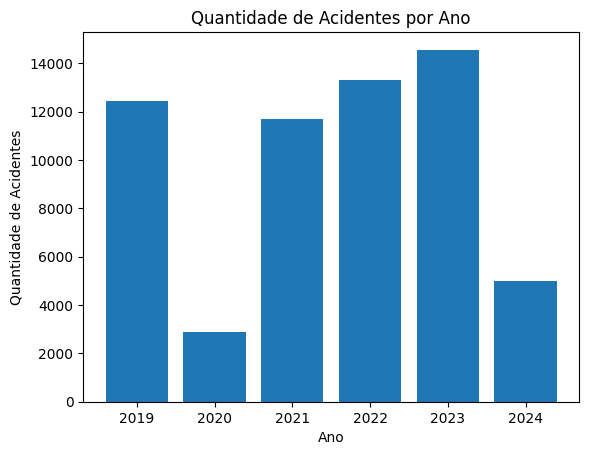

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df_ano.index, df_ano.values)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Acidentes')
plt.title('Quantidade de Acidentes por Ano')
plt.show

In [ ]:
df_ano/df_ano.max() # tira a proporção de acidentes referente ao maior ano

data
2023    1.000000
2022    0.914933
2019    0.854377
2021    0.803296
2024    0.343563
2020    0.198833
Name: count, dtype: float64

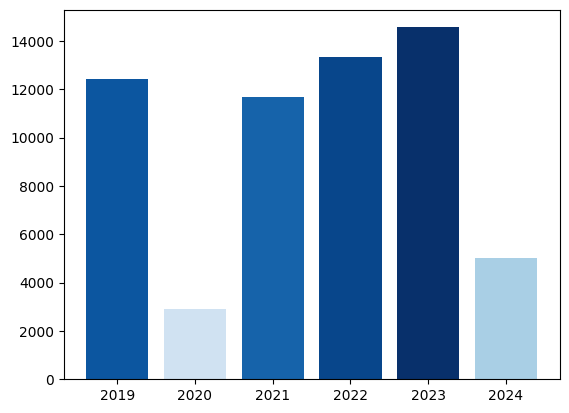

In [ ]:
# Criando um gradiente de cor para melhor visualização do gráfico

gradiente = df_ano/df_ano.max()
cores = plt.cm.Blues(gradiente)

plt.bar(df_ano.index, df_ano.values, color=cores)
plt.show()

# **Conclusão**

### É possível observar depois das análises exploratórias e por meio de gráficos que o ano de 2020 destoa dos outros devido a pandemia e por isso há uma diminuição brusca nos acidentes mas após esse anos podemos ver observar que estamos numa crescente de alta em acidentes em Porto Alegre.